## Лекция 4:
# Двухслойные итерационные схемы. 
* Общая идея методов
* Метод Якоби
* Метод Зейделя (с примерами кода)
* Методы неполной релаксации
* Пример (применение формул методов для матриц 2*2)
* Ускорение МПИ*

Канонический вид двухслойных схем: 

$R_{k}\frac{x^{k+1} - x^{k}}{\tau^{k}} + Ax^{k} = f$

Двухслойные схемы - схемы, использующие для вычисления нового значения $x^{k + 1}$ только значения $x^{k}$


## Общая идея методов


Итерационные методы определяются матрицей перехода R (её ещё называют матрицей Якоби). В этих методах часто используют разложение матрицы в сумму диагональной, верхней треугольной и нижней треугольной, так как к треугольным матрицам легко найти обратные (это позволяет вывести относительно простые формулы для матрицы перехода).

Преимущества итерационных методов:
- требуют хранения в памяти машины не всей
матрицы системы, а лишь нескольких векторов
с n компонентами;
- Погрешности окончательных результатов при
использовании итерационных методов не
накапливаются, поскольку точность
вычислений в каждой итерации определяется
результатами предыдущей итерации и
практически не зависит от ранее выполненных
вычислений.
- Большие системы уравнений на практике успешно можно решать только итерационными методами.


## Метод Якоби


Запишем СЛАУ в координатном виде:

$\begin{cases}
a_{11}x_{1} + a_{12}x_{2} + ... + a_{1n}x_{n} = f_{1} \\
a_{21}x_{1} + a_{22}x_{2} + ... + a_{2n}x_{n} = f_{2} \\
... \\
a_{n1}x_{1} + a_{n2}x_{2} + ... + a_{nn}x_{n} = f_{n} \\
\end{cases}$

Из каждого уравнения будем находить 1 новое приближение переменной $x_{i}$. Тогда получим:

$\begin{cases}
x_{1}^{(s+1)} =\frac{1}{a_{11}}(f_{1} - \sum\limits_{j = 2}^{n}a_{1j}x_{j}^{(s)}) \\
x_{i}^{(s+1)} =\frac{1}{a_{ii}}(f_{i} - \sum\limits_{j = 1}^{i-1}a_{ij}x_{j}^{(s)} + \sum\limits_{j = i + 1}^{n}a_{ij}x_{j}^{(s)}) \\
\end{cases}$

Запишем все это в матричном виде, для этого представим матрицу $A$ в виде суммы 3-х матриц:

$A = L + D + U$, где 

$L = \begin{bmatrix} 0 & 0 & \cdots & 0 \\ a_{21} & 0 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ a_{n1} & a_{n2} & \cdots & 0 \\ \end{bmatrix}$, 
$D = \begin{bmatrix} a_{11} & 0 & \cdots & 0 \\ 0 & a_{22} & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & a_{nn} \\ \end{bmatrix}$, 
$L = \begin{bmatrix} 0 & a_{12} & \cdots & a_{1n} \\ 0 & 0 & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & 0 \\ \end{bmatrix}$

Тогда получим:

$Lx^{(s)} + Dx^{(s + 1)} + Ux^{(s)} = f$

$Dx^{(s + 1)} = -(L + U)x^{(s)} + f$

$x^{(s+1)} = -D^{-1}(L + U)x^{(s)} + D^{-1}f$

Таким образом, мы можем проводить МПИ с матрицей $R = -D^{-1}(L + U)$.



Теорема:
Метод Якоби сходится тогда и только тогда, когда все значения $\lambda$, определяемые уравнением :

$det\begin{bmatrix}
\lambda a_{11} & a_{12} & \dots & a_{1n} \\
 a_{21} & \lambda a_{22} & \dots & a_{2n} \\
\dots & \dots & \dots & \dots \\
a_{n1} & a_{n2} & \dots & \lambda a_{nn} \\
\end{bmatrix} = 0$

по модулю меньше единицы.

Рассмотрим матрицу перехода $R = -D^{-1}(L + U)$. 
По теореме о сходимости МПИ : $\rho(R) < 1$

Вычислим спектральный радиус: 

$det(R - \lambda E) = det(-D^{-1}(L + U + \lambda D)) = det(-D^{-1})det(L + U +\lambda D) = 0$

Откуда $det(L + U + \lambda D) = 0$

## Метод Зейделя


В методе учитываются вычисленные ранее на данном шаге итерации компоненты решения - в этом его отличие от метода Якоби:

$\begin{cases}
a_{11}x_{1}^{(s+1)} + a_{12}x_{2}^{(s)} + ... + a_{1n}x_{n}^{(s)} = f_{1} \\
a_{21}x_{1}^{(s+1)} + a_{22}x_{2}^{(s+1)} + ... + a_{2n}x_{n}^{(s)} = f_{2} \\
... \\
a_{n1}x_{1}^{(s+1)} + a_{n2}x_{2}^{(s+1)} + ... + a_{nn}x_{n}^{(s+1)} = f_{n} \\
\end{cases}$

Или:

$\begin{cases}
x_{1}^{(s+1)} =\frac{1}{a_{11}}(f_{1} - \sum\limits_{j = 2}^{n}a_{1j}x_{j}^{(s)}) \\
x_{i}^{(s+1)} =\frac{1}{a_{ii}}(f_{i} - \sum\limits_{j = 1}^{i-1}a_{ij}x_{j}^{(s+1)} + \sum\limits_{j = i + 1}^{n}a_{ij}x_{j}^{(s)}) \\
\end{cases}$

Запишем в матричном виде: 

$(L + D)x^{(s+1)} + Ux^{(s)} = f$

$x^{(s+1)} = -(L + D)^{-1}Ux^{(s)} + (L + D)^{-1}f$

Теорема:
Метод Зейделя сходится тогда и только тогда, когда все значения $\lambda$, определяемые уравнением :

$det\begin{bmatrix}
\lambda a_{11} & a_{12} & \dots & a_{1n} \\
\lambda a_{21} & \lambda a_{22} & \dots & a_{2n} \\
\dots & \dots & \dots & \dots \\
\lambda a_{n1} & \lambda a_{n2} & \dots & \lambda a_{nn} \\
\end{bmatrix} = 0$

по модулю меньше единицы.

Рассмотрим матрицу перехода $R = -(L + D)^{-1}U$. 
По теореме о сходимости МПИ : $\rho(R) < 1$

Вычислим спектральный радиус: 

$det(R - \lambda E) = det(-(L + D)^{-1}(U + \lambda (L + D)) = det(-(L + D)^{-1})det(U +\lambda (L + D) = 0$

Откуда $det(U + \lambda (L + D)) = 0$

In [ ]:
import numpy as np
def seidel_matrix(A, f, error = 1.0e-9):
  n = len(f); x = np.zeros(n); r = np.copy(f)
  for k in range(10001):
    for i in range(n):
      x[i] = x[i] + (f[i] - (A[i,:] @ x))/A[i,i]
    r = f - (A @ x)
    if (r @ r) < error**2:
      return x, k
  print('Seidel method failed to converge')
  return -1

def seidel_not_matrix2(alpha, f, error = 1.0e-9):
  n = len(f); x = np.zeros(n); r, q = np.copy(f), np.copy(x)
  a1, a2, a3 = -1 + alpha, 2, -1 - alpha
  for k in range(10001):
    x[0] = x[0] + 0.5*(f[0] - a2*x[0] - a3*x[1])
    for i in range(1, n - 1):
      x[i] = x[i] + 0.5*(f[i] - a2*x[i] - a3*x[i+1] - a1*x[i-1])
    x[n-1] = x[n-1] + 0.5*(f[n-1] - a2*x[n-1] - a1*x[n-2])
    # q = Ax
    q[0] = - a2*x[0] - a3*x[1]
    for i in range(1, n - 1):
      q[i] = - a2*x[i] - a3*x[i+1] - a1*x[i-1]
    q[n-1] = - a2*x[n-1] - a1*x[n-2]
    r = f - (A @ x)
    if (r @ r) < error**2:
      return x, k
  print('Seidel method failed to converge')
  return -1

n = 10; alpha = 0.5; A = np.zeros((n,n)); f = np.zeros(n)
f[0], f[n-1] = 1 - alpha, 1 + alpha
for i in range(n):
  A[i,i] = 2
  if i > 0:
    A[i, i-1] = -1 + alpha
  if i < n - 1:
    A[i, i+1] = -1 - alpha
print(A, f, sep = '\n');  x, n_iter = seidel_not_matrix2(alpha, f)
print(x, n_iter, sep = '\n')

[[ 2.  -1.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  2.  -1.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  2.  -1.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  2.  -1.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  2.  -1.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  2.  -1.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  2.  -1.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  2.  -1.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -1.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2. ]]
[0.5 0.  0.  0.  0.  0.  0.  0.  0.  1.5]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
66


In [ ]:
'''
Матричный вариант можно улучшить, если заменять циклы
матричными операциями. 
Кроме того, для нашей задачи нужно вообще обойтись без матриц.
Эффективно использовать разреженные матрицы, и специальные способы
работы с ними в scipy.
'''

import numpy as np
def seidel(A, f, error = 1.0e-9): # матричный вариант
  n = len(f)
  x = np.zeros(n)
  r = np.copy(f)
  for k in range(1, 10001):
    '''y = f - (A @ x)
    y = y/(np.diag(A))
    x = x + y     - не эквивалентно ''' 
    for i in range(n):
      x[i] = x[i] + (f[i] - np.dot(A[i,0:n], x[0:n]))/A[i,i]
    r = f - (A @ x)
    '''for i in range(n):
      r[i] = f[i] - np.dot(A[i,0:n], x[0:n])'''
    if np.dot(r,r) < error**2:
      return x, k
  print('method failed to converge')
  return -1
n = 10; alpha = 0.5
A = np.zeros((n,n))
for i in range(n):
  A[i,i] = 2
  if i > 0:
    A[i,i-1] = -1 + alpha
  if i < n - 1:
    A[i,i+1] = -1 - alpha
print(A)
f = np.zeros(n); f[0] = 1 - alpha; f[n-1] = 1 + alpha
x, n_iter = seidel(A, f)
print(x, n_iter, sep = '\n')


[[ 2.  -1.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  2.  -1.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  2.  -1.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  2.  -1.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  2.  -1.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  2.  -1.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  2.  -1.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  2.  -1.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -1.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
67


In [ ]:
def matrix_dot(A1, A2, A3, x):
  n = len(x)
  q = np.zeros(n)
  q[0] = A2*x[0] + A3*x[1]
  for i in range(1, n-1):
    q[i] = A1*x[i-1] + A2*x[i] + A3*x[i+1]
  q[n - 1] = A1*x[n-2] + A2*x[n-1]
  return q

def seidel_not_matrix(alpha, f, error = 1.0e-9): # матричный вариант
  n = len(f)
  x = np.zeros(n)
  r = np.copy(f)
  A1 = -1 + alpha
  A2 = 2
  A3 = -1 - alpha
  for k in range(1, 10001):
    x[0] = x[0] + (f[0] - A2*x[0] - A3*x[1])/A2
    for i in range(1, n-1):
      q = A1*x[i-1] + A2*x[i] + A3*x[i+1]
      x[i] = x[i] + (f[i] - q)/A2
    q = A1*x[n-2] + A2*x[n-1]
    x[n - 1] = x[n - 1] + (f[n - 1] - q)/A2
    for i in range(n):
      r = f - matrix_dot(A1, A2, A3, x)
    if np.dot(r,r) < error**2:
      return x, k
  print('method failed to converge')
  return -1
n = 10; alpha = 0.5
f = np.zeros(n); f[0] = 1 - alpha; f[n-1] = 1 + alpha
x, n_iter = seidel_not_matrix(alpha, f)
print(x, n_iter, sep = '\n')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
67


##Методы неполной релаксации


Пусть $z_i^{(k + 1)}$ - $i$-я компонента $k + 1$ приближения Зейделя, тогда:

$x_i^{(k + 1)} = x_i^{(k)} + \omega (z_i^{(k + 1)} - x_i^{(k)})$

При $\omega = 1$ получается метод Зейделя. Метод при $\omega \in(0, 1)$ называют методом нижней релаксации. Если $\omega \in(1, 2)$ - методом верхней релаксации.

$x_i^{(k + 1)} = (1 - \omega)x_i^{(k)} + \omega z_i^{(k +1 )}$

Рассмотрим матричную запись данного метода: 

$(L + \omega D)\frac{x^{(k + 1)} - x^{(k)}}{\omega} + Ax^{(k)} = f$

Теорема:
Пусть матрица $A = A^* > 0$, тогда метод релаксации сходится $\forall\omega \in(0, 2)$

При каких $\omega$ метод сходится быстрее? В общем случае на этот вопрос нет универсального ответа, однако математиками было рассмотрено много частных случаев.

Рассмотрим один важный класс задач, для которого найдена такая $\omega$.

Пусть $P$ - матрица перестановок такая, что :

$PAP^\top = \begin{bmatrix} D1 & T_{12} \\ T_{21} & D2 \end{bmatrix}$
Где $D_i$ диагольная матрица.

Для таких задач $\omega_{\text(опт)} = \frac{1}{1 + \sqrt(1 - \rho^2(R))}$

Тут $R$ - матрица перехода Якоби итерационного метода ($\rho(R)$ - спектральный радиус, то есть наибольшее по модулю собственное число):
$$
\begin{gathered}
\vec{x}=R \vec{x}+\vec{F} 
\end{gathered}
$$

##Пример


$$
\left\{\begin{array}{l}
2 x_{1}+x_{2}=1 \\
x_{1}+2 x_{2}=-1
\end{array}\right.
$$
Точное решение системы имеет вид:
$$
\vec{x}^{*}=\left(\begin{array}{c}
1 \\
-1
\end{array}\right)
$$
Решим систему уравнений методами Якоби, Зейделя и ПВР.
Тогда для метода Якоби получим:
$$
\left\{\begin{array}{l}
x_{1}^{(s+1)}=-0,5 x_{2}^{(s)}+0,5 \\
x_{2}^{(s+1)}=-0,5 x_{1}^{(s)}-0,5
\end{array}\right.
$$
Для метода Зейделя:
$$
\left\{\begin{array}{l}
x_{1}^{(s+1)}=-0,5 x_{2}^{(s)}+0,5 \\
x_{2}^{(s+1)}=-0,5 x_{1}^{(s+1)}-0,5
\end{array}\right.
$$
Для метода ПВР:
$$
\left\{\begin{array}{l}
x_{1}^{(s+1)}=(1-\omega) x_{1}^{(s)}+\omega\left(-0,5 x_{2}^{(s)}+0,5\right) \\
x_{2}^{(s+1)}=(1-\omega) x_{2}^{(s)}+\omega\left(-0,5 x_{1}^{(s+1)}-0,5\right)
\end{array}\right.
$$
где значение параметра было выбрано $\omega=1,1$.
Для каждого метода рассмотрим три итерации. Тогда получим следующие значения:

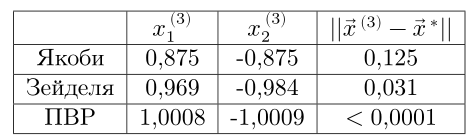  

Из таблицы видно, что метод ПВР сходится быстрее, чем методы Якоби и Зейделя. Вспомним, что для системы, в которой переменные можно разделить на два класса так, чтобы каждое уравнение связывало элемент одного класса с элементами другого, можно найти оптимальное значение параметра $\omega_{\text {опт }}$. Для систем уравнений с двумя переменными такое разделение выполняется всегда. Таким образом, при условии сходимости метода Якоби для системы второго порядка всегда можно найти оптимальное значение параметра.

Рассмотрим, чему равен спектральный радиус матрицы перехода для метода Якоби.
$$
\begin{gathered}
\vec{x}=R \vec{x}+\vec{F} \\
R_{\text {Якоби }}=\left(\begin{array}{cc}
0 & -0,5 \\
-0,5 & 0
\end{array}\right) \\
\lambda\left(R_{\text {Якоби }}\right)=\pm \frac{1}{2}, \quad \Rightarrow \quad \rho\left(R_{\text {Якоби }}\right)=\frac{1}{2}
\end{gathered}
$$
Тогда для метода ПВР получим:
$$
\omega_{\text {опт }}=\frac{2}{1-\sqrt{1-\left(\frac{1}{2}\right)^{2}}} \approx 1,07
$$
Именно поэтому значение $\omega$ было выбрано равным $1,1 .$

##Метод Чебышева ускорения МПИ*


Рассмотрим СЛАУ:

$Ax = f$

Пусть СЛАУ привели к виду: 

$x = Rx + F$

Рассмотрим метод простых итераций, который сходится к точному решению:

$x^{(s+1)} = Rx^{(s)} + F$

$x^{(s+1)} \rightarrow x^{(*)}$

Рассмотрим известную последовательность приближений $x^{(0)}, x^{(1)}, x^{(2)} ... x^{(m)}$. На основе данной последовательности построим новое приближение:

$y_m = \sum\limits_{i = 0}^{m}\gamma_{im}x^{(i)}$

Если $x^{(0)} = x^{(1)} = x^{(2)} = ... = x^{(m)} = x^{(*)}$, тогда :

$\sum\limits_{i = 0}^{m}\gamma_{im} = 1$

Рассмотрим погрешности системы: 

$\begin{cases}
x^{(m)} = Rx^{(m-1)} + F \\
x^{(*)} = Rx^{(*)} + F \\
\end{cases}$

$\delta^{(m)} = R(x^{(m-1)} - x^{(*)})$

Тогда: 

$\widetilde\delta = y_m - x^{(*)} = \sum\limits_{i = 0}^{m}\gamma_{im}x^{(i)} - x^{(*)} = \sum\limits_{i = 1}^{m}\gamma_{im}(x^{(i)} - x^{(*)}) = \sum\limits_{i = 1}^{m}\gamma_{im}(Rx^{(m-1)} - Rx^{(*)}) = P_m(R)(x^{(0)} - x^{(*)})$

Где $P_m(R) = \sum\limits_{i = 1}^{m}\gamma_{im}R^i$.


Многочлены Чебышева.

Многочленами Чебышева называют:

$T_{n + 1}(x) = 2xT_{n}(x) - T_(n - 1)(x)$

$T_0(x) = 1 , T_1(x) = x$

Все многочлены определены на отрезке $[-1; 1]$ и для всех выполняется $max(|T_n|)=1$.

Среди всех многочленов, значения которых на отрезке [-1,1] не превосходят по модулю 1, многочлен Чебышёва имеет наибольший старший коэффициент, наибольшее значение в любой точке за пределами этого отрезка, а нули многочлена Чебышева являются оптимальными узлами во многих вычислительных схемах.

Приведенным многочленом Чебышева назовем $\overline T_n(x) = 2^{1 - n}T_n(x)$

Рассмотрим многочлены вида:

$P_m(x) = \frac{T_m(\frac{x}{\rho})}{T_m(\frac{1}{\rho})}$

Для такого многочлена выполняется :
* Он определен от $-\rho$ до $\rho$
* $P_m(1) = 1$

Рассмотрим $\rho = 1 + \varepsilon$, тогда :

$P_m(x)\leq \frac{1}{T_m(1 + \varepsilon)}$

$P_m(x) = \frac{1}{T_m(\frac{1}{\rho})}T_m(\frac{x}{\rho})$

Обозначим $\mu_m = \frac{1}{T_m(\frac{1}{\rho})}$, тогда 

$\mu_m = \frac{2}{\rho\mu_{m-1}} - \frac{1}{\mu_{m-2}}$

Рассмотрим, как поменяется решение :

$y_m - x^* = P_m(R)(x^{(0)} - x^*) = \mu_mT_m(\frac{R}{\rho})(x^{(0)} - x^*) = 
\mu_m(\frac{2}{\rho}R(x^{(m - 1)} - x^*)\frac{1}{\mu_{m-1}} - (x^{(m - 2)} - x^*)\frac{1}{\mu_{m-2}} )$

Приведем выражение к виду : 

$y_m = \frac{2\mu_m}{\mu_{m-1}}\frac{R}{\rho}x^{(m-1)} - \frac{\mu_m}{\mu_{m-2}}x^{(m-2)} + dm$, где $dm = x^*(1 -  \frac{2\mu_m}{\mu_{m-1}}\frac{R}{\rho} + \frac{\mu_m}{\mu_{m-2}}) $

Для $x^*$ выполняется уравнение $x^* = Rx^* + F$, откуда $Rx^* = x^* - F$, тогда:

$dm = \mu_m(\frac{1}{\mu_m} - \frac{2}{\rho\mu_{m-1}} - \frac{1}{\mu_{m-2}})x^* + 2\frac{\mu_m}{\mu_{m -1 }}F$

В силу ранее полученных выражений первая скобка равна 0.

В итоге получаем итерационный процесс :

$\begin{cases}
\mu_0 = 1, \mu_1 = \rho \\
y_0 = x^{(0)}, y_1 = Rx^{(0)} + F \\
\mu_m = (\frac{2}{\rho\mu_{m - 1 }} - \frac{1}{\mu_{m-2}})^{-1} \\
y_m = \frac{2\mu_m}{\rho\mu_{m-1}}Ry_{m-1} - \frac{\mu_m}{\mu_{m-2}}Ry_{m-2} + \frac{2\mu_m}{\rho\mu_{m-2}}F
\end{cases}$

В данном ускорении используются все предыдущие вычисления, но в итоговой формуле только с предыдущих 2-х шагов. Данный алгоритм является трехслойным.